请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

# 《机器学习基础》课程设计

## （1）课程设计目标：
1. 掌握使用Pandas读取数据的方法。
1. 掌握数据探索与数据可视化方法。
1. 掌握使用逻辑回归、k近邻、高斯朴素贝叶斯、决策树、支持向量机、随机森林等算法训练分类模型的方法。
1. 掌握分类模型的评估方法。

## （2）数据简介
现有小麦种子数据集，该数据集共有210条数据，每条数据包含7个特征变量和1个类别标签。其中，特征变量包括area、perimeter、compactness、length of kernel、width of kernel、asymmetry coefficient和length of kernel groove，分别表示小麦种子的区域、周长、紧密度、籽粒长度、籽粒宽度、不对称系数和籽粒腹沟长度；类别标签表示小麦种子的所属类别，共有3个类别，分别用1、2和3表示，部分数据如表1所示。要求使用该数据集训练逻辑回归、k近邻、高斯朴素贝叶斯、决策树、支持向量机、随机森林模型，并从中选出最优模型，然后输出最优模型的评估报告。


表1-小麦种子数据集（部分）

| 区  域 | 周  长|紧 密 度|籽粒长度|籽粒宽度|不对称系数|籽粒腹沟长度|所属类别|
| -------- | -------- | -------- |-------- | -------- | -------- |-------- | -------- |
15.26|14.84|0.871|5.763|3.312|2.221|5.22|1|
14.88|14.57|0.8811|5.554|3.333|1.018|4.956|1|
14.29|14.09|0.905|5.291|3.337|2.699|4.825|1|
13.84|13.94|0.8955|5.324|3.379|2.259|4.805|1|
16.14|14.99|0.9034|5.658|3.562|1.355|5.175|1|
…|…|…|…|…|…|…|…
17.63|15.98|0.8673|6.191|3.561|4.076|6.06|2|
16.84|15.67|0.8623|5.998|3.484|4.675|5.877|2|
17.26|15.73|0.8763|5.978|3.594|4.539|5.791|2|
19.11|16.26|0.9081|6.154|3.93|2.936|6.079|2|
16.82|15.51|0.8786|6.017|3.486|4.004|5.841|2|






## （3）评分标准
1. 数据导入，数据探索（10%）
1. 数据可视化（10%）
1. 算法评估（30%）：采用至少4中分类方法，可采用调参方法。
1. 训练与评估模型，预测新数据（10%）
1. 注释（10%）

# （4）提交内容
1. ipynb源代码；
1. 录屏视频，要求运行程序并进行讲解（讲解内容包括代码以及运行结果）。（20%）**录制视频大小小于200M**。

In [3]:
# 导入库
import pandas as pd
import numpy as np
from paddle.distributed.fleet import scaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [4]:
# 读取小麦种子数据集
names = ['area', 'perimeter', 'compactness', 'length of kernel','width of kernel', 'asymmetry coefficient', 'length of kernel groove','label']
dataset = pd.read_csv("C:\\Users\\33079\PycharmProjects\pys\seed\seeds_dataset2024.txt",delimiter='\t',names=names)
print(dataset)

      area  perimeter  compactness  length of kernel  width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     asymmetry coefficient  length of kernel groove  label  
0                    2.221                    5.220      1  
1

# 逻辑回归

D:\conda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


模型正确率: 0.9206349206349206


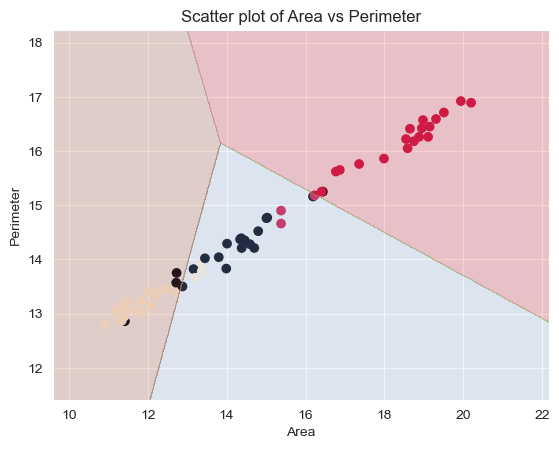

In [5]:
#数据标准化
data = dataset.iloc[:, 0:7] #选择特征area与perimeter
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

#回归模型创建与训练
model1 = LogisticRegression()
model1.fit(x_train, y_train)

#预测
acc = accuracy_score(y_test, model1.predict(x_test))
print('模型正确率:',acc)

#仅选择两个特征用于可视化
data = dataset.iloc[:, range(0,2)] #选择特征area与perimeter
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
model1 = LogisticRegression()
model1.fit(x_train, y_train)

plt.scatter(x_test['area'], x_test['perimeter'], c=y_test)
h = .02
x_min, x_max = x['area'].min() - 1, x['area'].max() + 1
y_min, y_max = x['perimeter'].min() - 1, x['perimeter'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter plot of Area vs Perimeter')
plt.show()


# 逻辑回归预测

In [15]:
new_data = np.array([[17.63, 15.98]])
prediction = model1.predict(new_data)


accuracy = accuracy_score(y_train, model1.predict(x_train))
print("准确率:", accuracy)
print("预测的数据为:", prediction)

准确率: 0.8979591836734694
预测的数据为: [2]


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# knn

<class 'numpy.ndarray'> [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


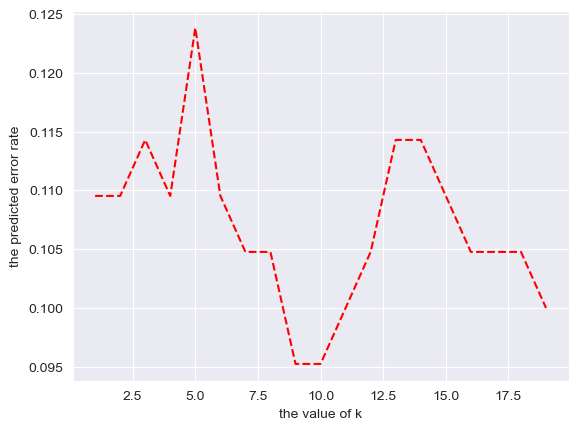

k=9时预测模型的准确率: 0.873015873015873
测试集的预测标签值为: [1 3 2 1 3 3 1 3 1 3 2 3 3 2 1 2 1 1 3 2 2 1 3 2 2 3 1 2 1 3 3 3 2 1 2 1 3
 2 2 3 3 3 3 2 3 1 3 2 2 1 1 3 2 1 3 1 2 1 1 1 1 1 2]
测试集的真实标签值为: [1 3 2 3 1 3 1 3 1 3 2 3 3 2 1 2 3 1 3 2 2 1 3 2 2 3 1 2 1 3 3 1 2 1 2 2 3
 2 2 3 3 3 3 2 3 1 3 2 2 1 1 3 2 1 1 2 2 1 1 1 3 1 2]


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


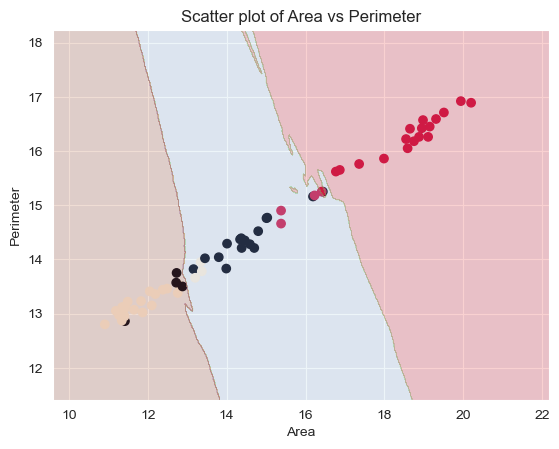

准确率: 0.8775510204081632
预测的数据为: [2]


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [8]:
#数据标准化
data = dataset.iloc[:, range(0,7)]
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
print(type(target),target)
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

#模型创建与训练
k_range = range(1,20)
k_error = []
for k in k_range:
    model2 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model2, x, y, cv=5, scoring='accuracy')
    k_error.append(1-scores.mean())
plt.plot(k_range, k_error, 'r--')
plt.xlabel('the value of k')
plt.ylabel('the predicted error rate')
plt.show()
model2 = KNeighborsClassifier(n_neighbors=10) #选取最优k值
model2.fit(x_train, y_train)

#预测
pred = model2.predict(x_test)
ac = accuracy_score(y_test, pred)
print('k=9时预测模型的准确率:', ac)
print('测试集的预测标签值为:', pred)
print('测试集的真实标签值为:', y_test)

#仅选择两个特征用于可视化
data = dataset.iloc[:, range(0,2)] #选择特征area与perimeter
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
model2 = KNeighborsClassifier(n_neighbors=10) #选取最优k值
model2.fit(x_train, y_train)

plt.scatter(x_test['area'], x_test['perimeter'], c=y_test)
h = .02
x_min, x_max = x['area'].min() - 1, x['area'].max() + 1
y_min, y_max = x['perimeter'].min() - 1, x['perimeter'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter plot of Area vs Perimeter')
plt.show()

# knn数据预测

In [16]:
new_data = np.array([[17.63, 15.98]])
prediction = model2.predict(new_data)


accuracy = accuracy_score(y_train, model2.predict(x_train))
print("准确率:", accuracy)
print("预测的数据为:", prediction)

准确率: 0.8775510204081632
预测的数据为: [2]


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 朴素贝叶斯

<class 'numpy.ndarray'> [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
测试集数据的预测标签为 [1 3 2 1 3 3 1 3 2 3 2 3 3 2 1 2 3 1 3 2 2 1 3 2 2 3 1 2 1 3 3 3 2 1 2 1 3
 2 2 3 1 3 3 2 3 1 3 2 2 1 1 3 2 1 3 1 2 1 1 1 3 1 2]
测试集数据的真实标签为 [1 3 2 3 1 3 1 3 1 3 2 3 3 2 1 2 3 1 3 2 2 1 3 2 2 3 1 2 1 3 3 1 2 1 2 2 3
 2 2 3 3 3 3 2 3 1 3 2 2 1 1 3 2 1 1 2 2 1 1 1 3 1 2]

测试集共有63条数据,其中预测错误的数据有8条,预测准确率为0.87


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


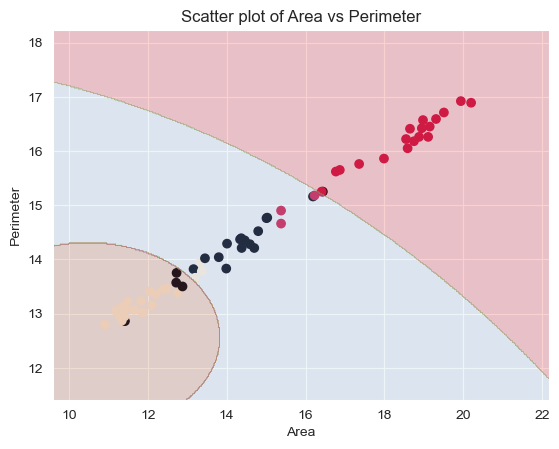

In [12]:
# 高斯朴素贝叶斯
#数据标准化
data = dataset.iloc[:, range(0,7)]
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
print(type(target),target)
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

#定义与训练模型
model3=GaussianNB()	    #建立高斯朴素贝叶斯模型
model3.fit(x_train,y_train)		#训练模型

#模型评估
pred=model3.predict(x_test)  #测试集的预测值
print("测试集数据的预测标签为",pred)
print("测试集数据的真实标签为",y_test)
print("\n测试集共有%d条数据,其中预测错误的数据有%d条,预测准确率为%.2f"%(x_test.shape[0],(pred!=y_test).sum(),accuracy_score(y_test,pred)))


#仅选择两个特征用于可视化
data = dataset.iloc[:, range(0,2)] #选择特征area与perimeter
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
model3=GaussianNB()
model3.fit(x_train,y_train)

plt.scatter(x_test['area'], x_test['perimeter'], c=y_test)
h = .02
x_min, x_max = x['area'].min() - 1, x['area'].max() + 1
y_min, y_max = x['perimeter'].min() - 1, x['perimeter'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter plot of Area vs Perimeter')
plt.show()

# 朴素贝叶斯预测

In [35]:
new_data = np.array([[17.63, 15.98]])
prediction = model3.predict(new_data)


accuracy = accuracy_score(y_train, model3.predict(x_train))
print("准确率:", accuracy)
print("预测的数据为:", prediction)

准确率: 0.8979591836734694
预测的数据为: [2]


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# 决策树

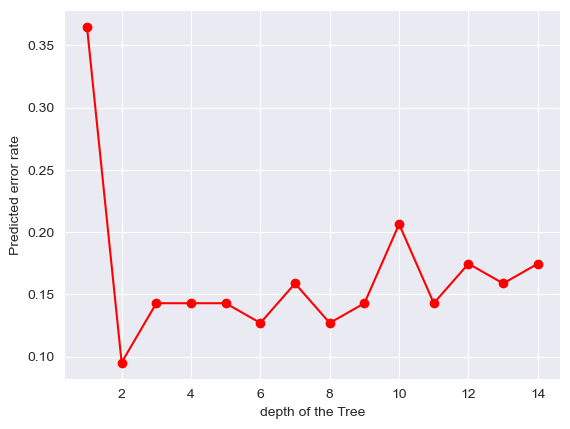

模型预测的准确率为： 0.9047619047619048


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


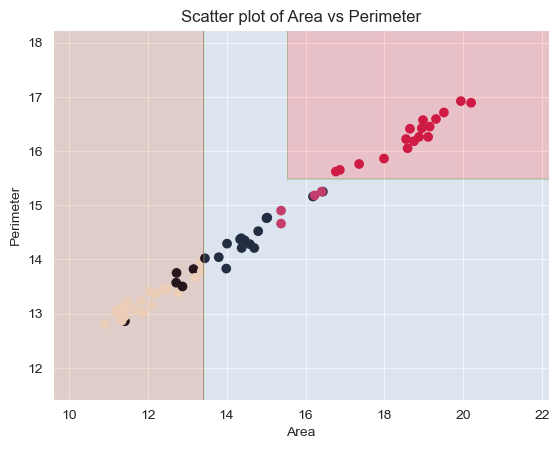

In [32]:

#数据标准化
data = dataset.iloc[:, range(0,7)]
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

depth = np.arange(1,15)
err_list = []
for i in depth:
    model4 = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model4.fit(x_train,y_train)
    pred = model4.predict(x_test)
    ac = accuracy_score(y_test, pred)
    err = 1-ac
    err_list.append(err)

plt.plot(depth, err_list, 'ro-')
plt.xlabel('depth of the Tree')
plt.ylabel('Predicted error rate')
plt.show()

model4 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model4.fit(x_train,y_train)
pred = model4.predict(x_test)
ac = accuracy_score(y_test, pred)
print('模型预测的准确率为：',ac)

#仅选择两个特征用于可视化
data = dataset.iloc[:, range(0,2)] #选择特征area与perimeter
target = dataset.iloc[:, -1].values.reshape(1,210)[0]
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
model4 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model4.fit(x_train,y_train)

plt.scatter(x_test['area'], x_test['perimeter'], c=y_test)
h = .02
x_min, x_max = x['area'].min() - 1, x['area'].max() + 1
y_min, y_max = x['perimeter'].min() - 1, x['perimeter'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter plot of Area vs Perimeter')
plt.show()

# 决策树预测

In [33]:
new_data = np.array([[17.63, 15.98]])
prediction = model4.predict(new_data)
accuracy = accuracy_score(y_train, model4.predict(x_train))
print("准确率:", accuracy)
print("预测的数据为:", prediction)

准确率: 0.891156462585034
预测的数据为: [2]


D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
